In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Overview
Here we load the historic dataset and display the first few rows to understand its structure and attributes.

In [2]:
historic_data = pd.read_csv(r"DSW_ML_Test/historic.csv")

In [3]:
historic_data.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [4]:
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


The dataset is complete, with no missing values across any of the 8000 entries.
The stars column is the only one containing numerical data (float values), which can be used for performance or popularity analysis.
The success_indicator column is a categorical variable that can help identify which items are successful ("top") and which are not ("flop").

In [5]:
# Summary statistics of the dataset
historic_data.describe(include='all')

,item_no,category,main_promotion,color,stars,success_indicator
count,8000.000000,8000,8000,8000,8000.000000,8000
unique,NaN,6,4,10,NaN,2
top,NaN,Tunic,Category_Highlight,Multi-Color,NaN,top
freq,NaN,1650,2432,1443,NaN,5185
mean,546474.338375,NaN,NaN,NaN,3.473075,NaN
std,256513.463874,NaN,NaN,NaN,0.978810,NaN
min,100171.000000,NaN,NaN,NaN,0.300000,NaN
25%,325001.500000,NaN,NaN,NaN,2.800000,NaN
50%,547081.000000,NaN,NaN,NaN,3.500000,NaN
75%,764312.250000,NaN,NaN,NaN,4.200000,NaN


Item Count: There are 8,000 total items in the dataset.

Category: There are 6 unique categories, with "Tunic" being the most frequent (1,650 occurrences).

Main Promotion: There are 4 unique promotions, with "Category_Highlight" being the most common (2,432 occurrences).

Color: There are 10 unique color options, with a variety of color distributions.

Stars (Ratings): Ratings range from a minimum of 0.3 to a maximum of 6.1, with an average rating of approximately 3.47. The standard deviation of 0.98 indicates variability in ratings. The median rating (50th percentile) is 3.5, suggesting that half of the items have ratings below this value.

Success Indicator: There are 2 unique values, with a frequency of 5,185 for the most common value, indicating that a large majority of items fall into one category of success.

Descriptive Statistics:

Mean Price: The average price of items is approximately 546,474.

Price Range: Prices range from 100,171 (minimum) to 989,740 (maximum).


Quartiles:

25% of items are priced at or below 325,001.5.

50% (median) are priced at or below 547,081.

75% are priced at or below 764,312.25, indicating that prices are skewed toward higher values.

In [6]:
# missing values 
# Check for missing values
missing_values = historic_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [7]:
historic_data.isnull().sum()

item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

there is no missing values in the historic dataset

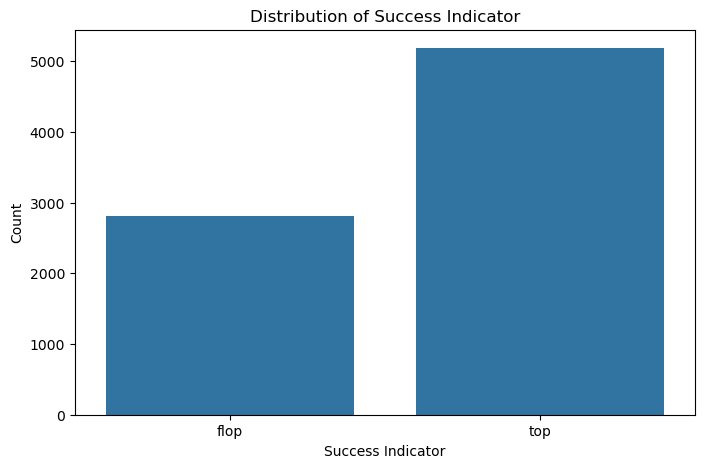

In [8]:
# distribution of success indicator
# Distribution of success_indicator
plt.figure(figsize=(8, 5))
sns.countplot(x='success_indicator', data=historic_data)
plt.title('Distribution of Success Indicator')
plt.xlabel('Success Indicator')
plt.ylabel('Count')
plt.show()

"top" category is significantly more common than the "flop" category, suggesting that the majority of instances fall under the "top" success indicator.

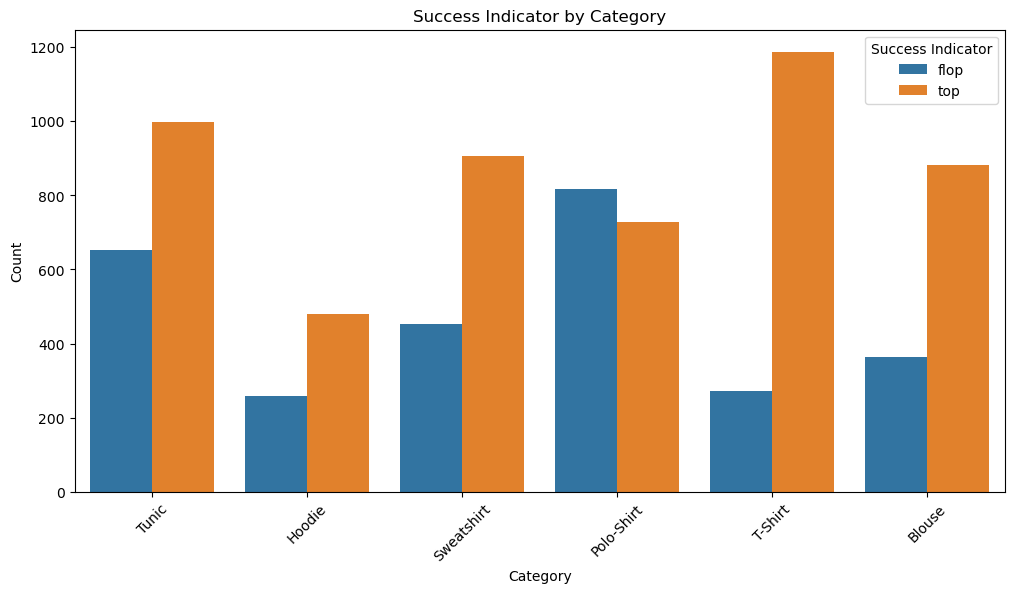

In [9]:
# categorical variable analysis
# Success indicator by category
plt.figure(figsize=(12, 6))
sns.countplot(data=historic_data, x='category', hue='success_indicator')
plt.title('Success Indicator by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Success Indicator')
plt.show()

### Category-wise Success Indicator
- T-Shirt and Tunic categories perform exceptionally well, with a dominant "top" success indicator.
- Polo-Shirt has a relatively higher "flop" count compared to its "top" count, indicating underperformance in this category.
- Overall, most categories have a larger "top" success indicator, showing strong performance across clothing categories, except for Polo-Shirts, which needs attention.

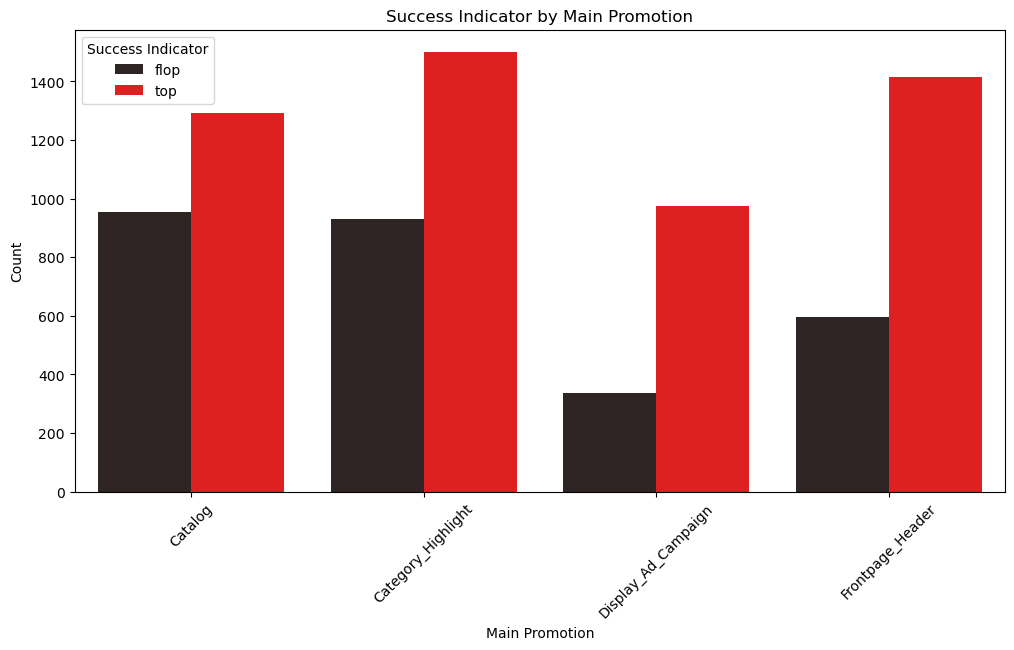

In [10]:
# Success indicator by main promotion
plt.figure(figsize=(12, 6))
sns.countplot(data=historic_data, x='main_promotion', hue='success_indicator',color="Red")
plt.title('Success Indicator by Main Promotion')
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Success Indicator')
plt.show()

### Main Promotion Analysis
- Category Highlight and Frontpage Header are the most successful promotions, with a significantly higher proportion of top-performing products.
- Display Ad Campaign has the fewest failures but also a smaller number of top successes compared to other promotions.
- Catalog shows a more balanced outcome, with nearly equal success and failure rates, making it a less reliable option for driving high product success.

Overall, focusing on Category Highlight and Frontpage Header promotions seems to drive the best results.

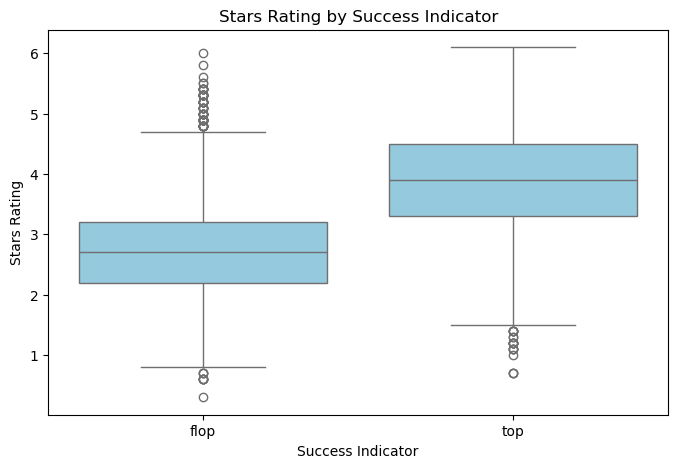

In [11]:
# Boxplot for stars vs success indicator
plt.figure(figsize=(8, 5))
sns.boxplot(x='success_indicator', y='stars', data=historic_data,color="skyblue")
plt.title('Stars Rating by Success Indicator')
plt.xlabel('Success Indicator')
plt.ylabel('Stars Rating')
plt.show()

- The graph illustrates a clear distinction in star ratings based on the Success Indicator.
- Top-rated items generally receive higher star ratings than flop-rated items, indicating that promotions or products classified as top performers tend to garner better reviews.
- The presence of outliers in both categories suggests variability in customer perceptions, with some flop items surprisingly rated highly and some top items rated significantly lower.

In [12]:
historic_data[['stars']].describe(include='all')

,stars
count,8000.000000
mean,3.473075
std,0.978810
min,0.300000
25%,2.800000
50%,3.500000
75%,4.200000
max,6.100000


In [13]:
historic_data[historic_data['stars']>5]

,item_no,category,main_promotion,color,stars,success_indicator
11,405726,Hoodie,Category_Highlight,White,5.5,top
58,301758,T-Shirt,Category_Highlight,Yellow,5.4,top
78,566361,Blouse,Category_Highlight,Green,5.4,top
113,640808,Tunic,Category_Highlight,Black,5.2,top
119,198091,Tunic,Category_Highlight,Blue,5.2,top
...,...,...,...,...,...,...
7899,680997,Hoodie,Display_Ad_Campaign,Yellow,5.1,flop
7918,727551,T-Shirt,Frontpage_Header,Multi-Color,5.4,top
7934,574620,Blouse,Display_Ad_Campaign,Green,5.3,top
7937,522999,Blouse,Frontpage_Header,Black,5.4,top


387 products star rating greater than 5 is considered an outlier. Such ratings exceed the maximum limit set for the evaluation and indicate potential anomalies in the data collection or rating process.